### Feature dimension reduction

Generate a 2 dimensional dataset, and then generalize to higher dimensions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

In [44]:

### generate 3d dataset
def generate_data(num_pts):
    # A two dimensional toy dataset
    t = np.random.rand(num_pts)
    x1 = 0.5*np.random.rand(num_pts,2)
    y1 = 4*np.random.rand(num_pts) - 2

    # A two dimensional toy dataset
    t = np.random.rand(num_pts)
    x2 = 0.5*np.random.rand(num_pts,2) + 1
    y2 = 4*np.random.rand(num_pts) - 2
    
    return x1,y1,x2,y2
    
### plot 3d data
def plot_3d_data(x1,y1,x2,y2,ax):
    # plot first class
    ax.scatter(x1[:,0],x1[:,1],y1,c = 'b')

    # plot second class
    ax.scatter(x2[:,0],x2[:,1],y2,c = 'r')

    # clean up the plot
    ax.set_xticks(np.arange(0, 2,0.5));
    ax.set_yticks(np.arange(0, 2,0.5));
    ax.view_init(20,80)
    
### plot 2d data
def plot_2d_data(data,ax,num_pts):
    ax.scatter(data[0:num_pts,0],data[0:num_pts,1],color = 'b')
    ax.scatter(data[num_pts:,0],data[num_pts:,1],color = 'r')
    ax.set_xticks([],[]);
    ax.set_yticks([],[]);

### format the dataset
def format_data(x1,y1,x2,y2):
    # format first class
    x1 = np.asarray(x1)
    y1 = np.asarray(y1)
    y1.shape = (len(y1),1)
    data1 = np.concatenate((x1,y1),axis = 1)

    # format second class
    x2 = np.asarray(x2)
    y2 = np.asarray(y2)
    y2.shape = (len(y2),1)
    data2 = np.concatenate((x2,y2),axis = 1)
    data = np.concatenate((data1,data2),axis = 0)
    return data

### plot plane that data is projected onto
def plot_plane(data,clf,ax):
    # form plane from random matrix
    a = clf.components_
    vec1 = a[0,:]
    vec2 = a[1,:]
    normal_vec = np.cross(vec1,vec2)
    normal_vec.shape = (len(normal_vec),1)
    normal_vec = normal_vec/np.linalg.norm(normal_vec)
    bias = np.dot(normal_vec.T,vec1)
    
    # we are going to translate the plane - for visualization purposes - so that the mean of the dataset lies on it
    pt = np.mean(data,axis = 0)
    pt.shape = (len(pt),1)
  
    # get everything ready to plot
    d1 = -np.sum(pt*normal_vec)

    # create x,y
    xran = np.linspace(np.min(data[:,0]) - 0.2,np.max(data[:,0]) + 0.2)
    yran = np.linspace(np.min(data[:,1]) - 0.2,np.max(data[:,1]) + 0.2)
    xx, yy = np.meshgrid(xran, yran)

    # calculate corresponding ax + by + cz + d = 0, solve for z,  z = - (ax + by + d)/c
    z1 = -(normal_vec[0]*xx + normal_vec[1]*yy + d1)*1./normal_vec[2]

    # plot the surface
    ax.plot_surface(xx,yy,z1, color='black',alpha = 0.1)
    
    # plot normal vector
    x1 = pt[0]
    x2 = pt[0] + normal_vec[0]
    x3 = pt[0] - normal_vec[0]
    y1 = pt[1]
    y2 = pt[1] + normal_vec[1]
    y3 = pt[1] - normal_vec[1]
    z1 = pt[2]
    z2 = pt[2] + normal_vec[2]
    z3 = pt[2] - normal_vec[2]
    ax.scatter(x1,y1,z1,c = 'g',s = 50)
    ax.scatter(x2,y2,z2,c = 'g',s = 50)
    ax.scatter(x3,y3,z3,c = 'g',s = 50)
    
    t = np.linspace(0, 1, 100)
    x = pt[0] + t*normal_vec[0]
    y = pt[1] + t*normal_vec[1]
    z = pt[2] + t*normal_vec[2]

    ax.plot(x,y,z,color = 'g')
    
    # clean up panel
    ax.set_xlim([np.min(data[:,0]) - 0.1, np.max(data[:,0]) + 0.1])
    ax.set_ylim([np.min(data[:,1]) - 0.1, np.max(data[:,1]) + 0.1])
    ax.set_zlim([np.min(data[:,2]) - 0.1, np.max(data[:,2]) + 0.1])
    
### plot 2d and 3d representations
def plot_orig_trans(x1,y1,x2,y2,trans_data,num_pts):

    fig = plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(121,projection='3d')
    plot_3d_data(x1,y1,x2,y2,ax)
    data = format_data(x1,y1,x2,y2)
    plot_plane(data,clf,ax)
    
    ax = fig.add_subplot(122)
    plot_2d_data(trans_data,ax,num_pts)

<IPython.core.display.Javascript object>


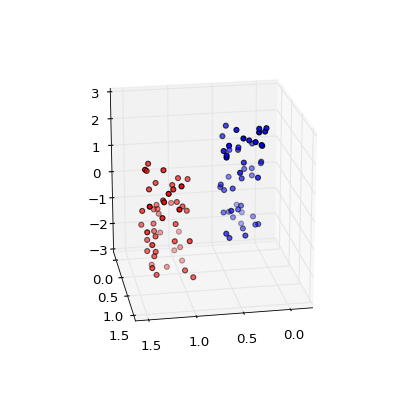

In [45]:
# generate a toy dataset
num_pts = 50
x1,y1,x2,y2 = generate_data(num_pts)

# plot it
fig = plt.figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(111,projection='3d')
plot_3d_data(x1,y1,x2,y2,ax1)        

<IPython.core.display.Javascript object>


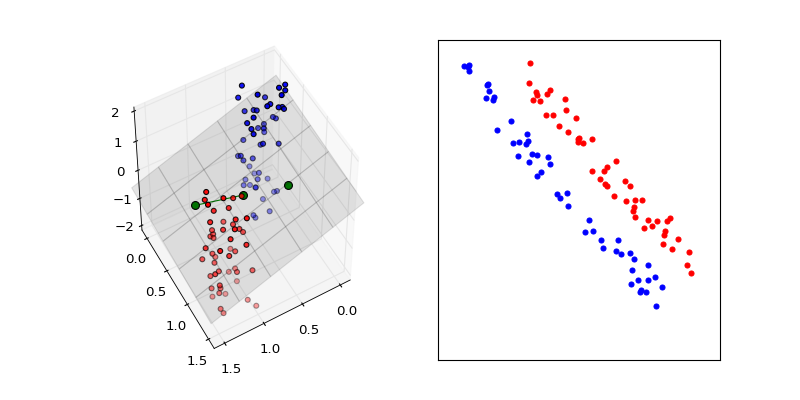

In [48]:

# load in clustering algorithm
from sklearn import random_projection

# create instance of clustering algorithm
clf = random_projection.GaussianRandomProjection(n_components = 2)

# format data properly for clustering algorithm
data = format_data(x1,y1,x2,y2)
transformed_data = clf.fit_transform(data);

# display dataset and transformed dataset
plot_orig_trans(x1,y1,x2,y2,transformed_data,num_pts)

In [49]:
transformed_data = clf.fit_transform(data);
c = clf.components_
my_transform = np.dot(data,c.T)

In [50]:
np.linalg.norm(transformed_data - my_transform)

0.0

In [49]:
clf.components_

array([[ 0.27521202, -0.10975212, -0.22329435],
       [-0.71911084,  1.00962153,  0.47520748]])

In [43]:
type(z)

numpy.ndarray